# Regression with Red Wine

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.set_printoptions(precision = 3, suppress = True)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Load Data with Pandas

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                'alcohol', 'quality']

raw_dataset = pd.read_csv(url, sep = ';')

In [4]:
dataset = raw_dataset.copy()
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Check if dataset contains unknown values**

In [6]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Split the dataset into a training set and a test set**

In [7]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

** Look at the overall statistics **

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1279.0,8.310164,1.744190,4.60000,7.1000,7.90000,9.250000,15.9000
volatile acidity,1279.0,0.525571,0.176645,0.12000,0.3900,0.52000,0.635000,1.5800
citric acid,1279.0,0.271618,0.196822,0.00000,0.0900,0.26000,0.430000,0.7900
residual sugar,1279.0,2.516341,1.300985,0.90000,1.9000,2.20000,2.600000,13.9000
chlorides,1279.0,0.087347,0.045666,0.01200,0.0710,0.07900,0.091000,0.6110
free sulfur dioxide,1279.0,15.868647,10.438880,1.00000,7.0000,14.00000,21.000000,72.0000
total sulfur dioxide,1279.0,46.488663,32.952841,6.00000,22.0000,38.00000,62.000000,289.0000
density,1279.0,0.996739,0.001888,0.99007,0.9956,0.99676,0.997855,1.0032
pH,1279.0,3.312588,0.153923,2.87000,3.2100,3.31000,3.400000,4.0100
sulphates,1279.0,0.655012,0.160192,0.33000,0.5500,0.62000,0.730000,1.9800


** Split the features from the labels **

In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('quality')
test_labels = test_features.pop('quality')

## Normalization Layer

In [10]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
fixed acidity,8.310164,1.744190
volatile acidity,0.525571,0.176645
citric acid,0.271618,0.196822
residual sugar,2.516341,1.300985
chlorides,0.087347,0.045666
free sulfur dioxide,15.868647,10.438880
total sulfur dioxide,46.488663,32.952841
density,0.996739,0.001888
pH,3.312588,0.153923
sulphates,0.655012,0.160192


In [11]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[ 8.31   0.526  0.272  2.516  0.087 15.869 46.489  0.997  3.313  0.655
 10.436]


In [12]:
first = np.array(train_features[:1])

with np.printoptions(precision = 2, suppress = True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[10.8   0.47  0.43  2.1   0.17 27.   66.    1.    3.17  0.76 10.8 ]]

Normalized: [[ 1.43 -0.31  0.81 -0.32  1.83  1.07  0.59  0.77 -0.93  0.66  0.34]]


**Define function for plotting the loss during training**

In [13]:
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.ylim([0, 5])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

## Build and Compile Model

In [14]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(loss = 'mean_absolute_error',
                optimizer = tf.keras.optimizers.Adam())
  return model

In [15]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 232
Trainable params: 209
Non-trainable params: 23
_________________________________________________________________


## Train

In [16]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split = 0.2,
    verbose = 0, epochs = 200)

CPU times: user 11.2 s, sys: 1.39 s, total: 12.6 s
Wall time: 9.52 s


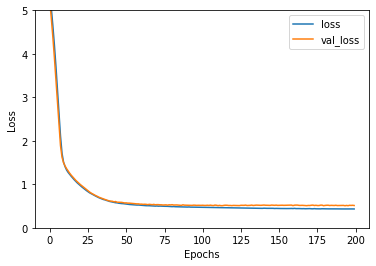

In [17]:
plot_loss(history)

## Evaluate

In [18]:
model_results = {}
model_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose = 0)

In [19]:
pd.DataFrame(model_results, index = ['Mean Absolute Error [Quality]']).T

,Mean Absolute Error [Quality]
dnn_model,0.487629


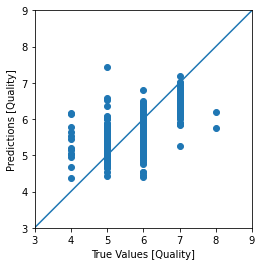

In [20]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Quality]')
plt.ylabel('Predictions [Quality]')
lims = [3, 9]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

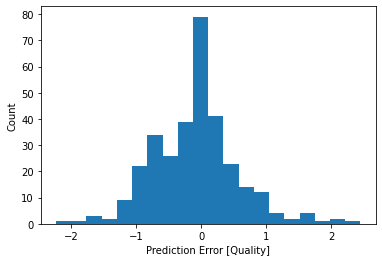

In [21]:
error = test_predictions - test_labels
plt.hist(error, bins = 20)
plt.xlabel('Prediction Error [Quality]')
_ = plt.ylabel('Count')